In [8]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import flim_processing as fp
import flim_analysis as fa
import flim_geometry as fg
import flim_ui as fui

# Case - Current

intensity (1090, 504, 512) (1090, 462, 512)
lifetime_phase (1090, 504, 512) (1090, 462, 512)
value (1090, 504, 512) (1090, 462, 512)


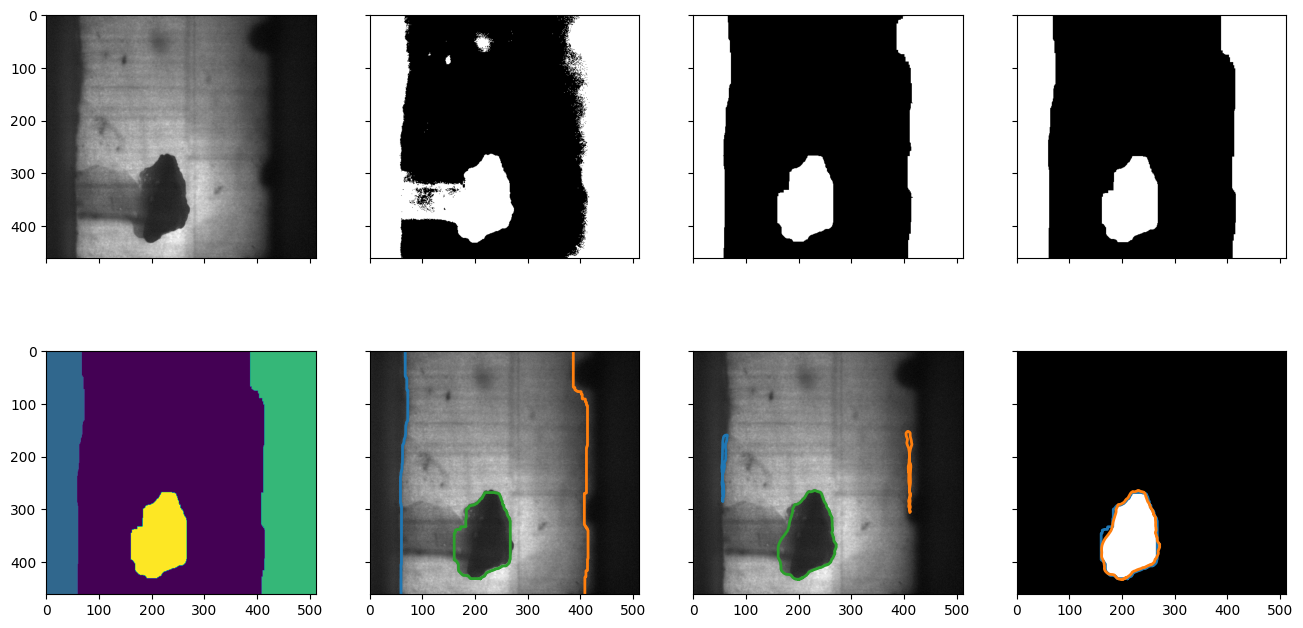

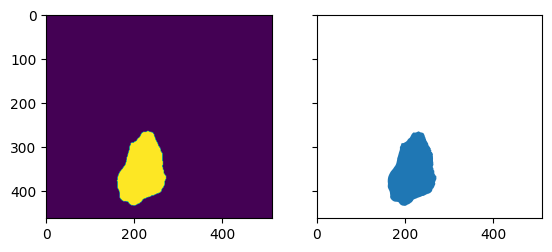

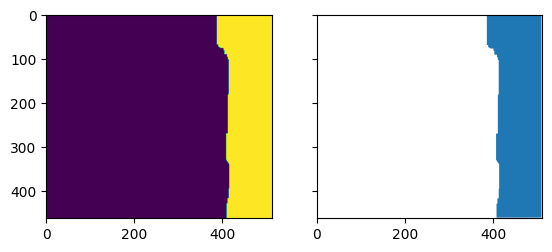

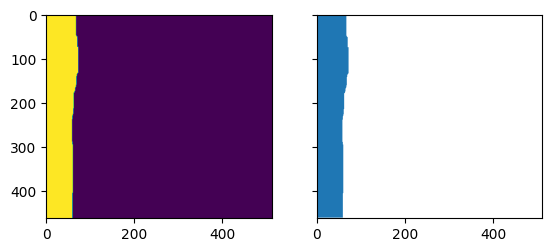

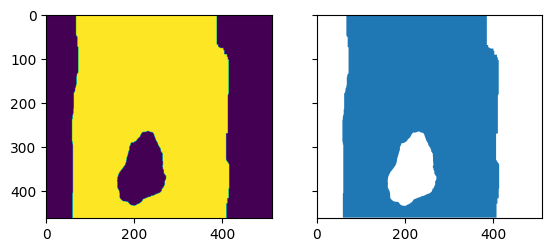

In [7]:
#raw_path = r"D:\[Code]\paper01\data\current.NPZ"
#fp.process_raw_flim(raw_path)
current_data_path = r"D:\[Code]\paper01\data\current_p.npz"
current_data = fp.open_flim(
    current_data_path,
    property_modifications={"lifetime_phase": 1000, "value": 1000},
)
(
    particle_mask,
    structure_index,
    process_properties,
    final_properties,
) = fa.extract_feature(
    current_data["intensity"][0],
    adaptive_threshold=431,
    kernel_shape=(20, 50),
    kernel_type="rectangle",
    first="open",
    snake_alpha=0.09,
    snake_beta=0.1,
    snake_gamma=0.01,
    snake_w_line=-3,
    snake_w_edge=10,
    nth_element=1,
    plot_process=True,
)
particle = fg.get_feature_from_contour(
    process_properties["snakes"][structure_index],
    np.zeros(current_data["intensity"][0].shape),
    name="particle",
)
wall_index = 0
wall_mask = np.zeros(current_data["intensity"][0].shape)
wall_mask[process_properties["labeled"] == wall_index + 1] = 1
wall = fg.get_feature_from_mask(wall_mask, name="wall")

membrane_index = 1
membrane_mask = np.zeros(current_data["intensity"][0].shape)
membrane_mask[process_properties["labeled"] == membrane_index + 1] = 1
membrane = fg.get_feature_from_mask(membrane_mask, "membrane")

volume = fg.get_rest_as_feature(features=[particle, membrane, wall], name="volume")

features = [particle, membrane, wall, volume]
for feature in features:
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
    ax = np.ravel(axes)[0]
    ax.imshow(feature.raster)
    ax = np.ravel(axes)[1]
    gpd.GeoSeries(feature.geometry).plot(ax=ax)
    plt.show()

fg.save_features(
    os.path.dirname(current_data_path), features, feature_base="current"
)

# Case - Time

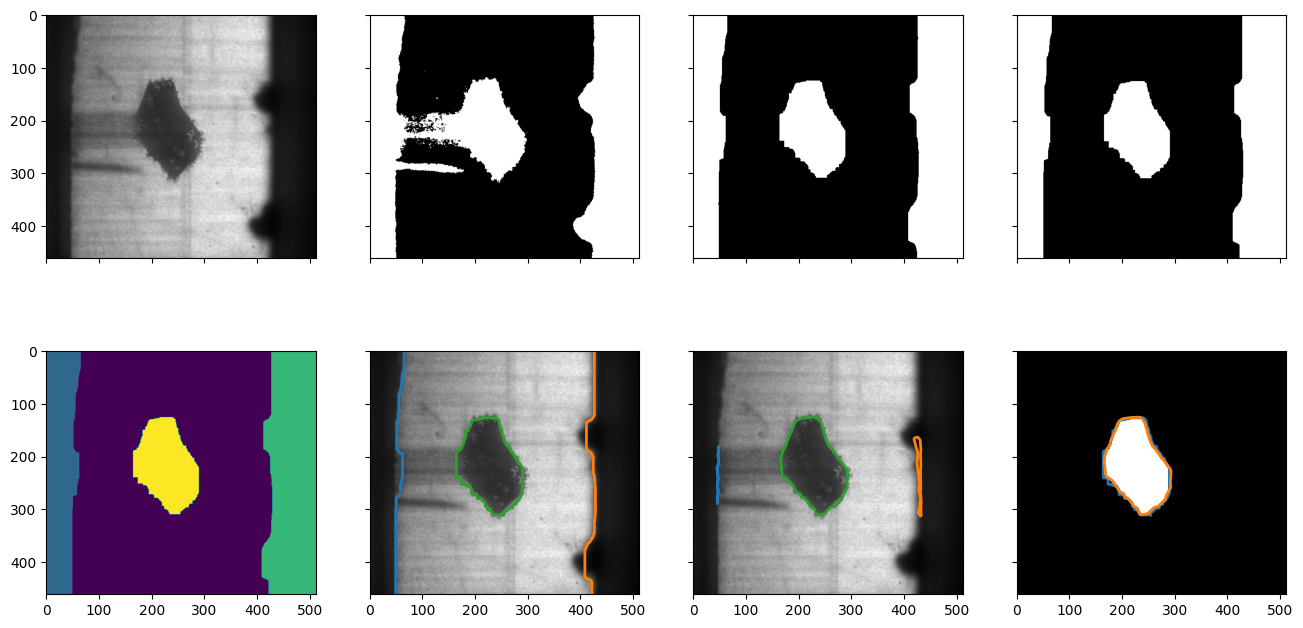

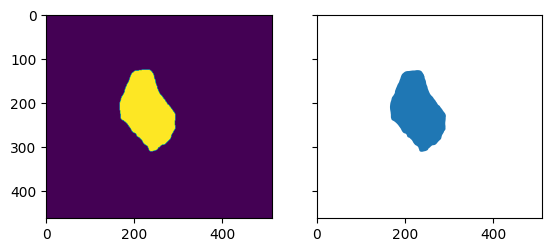

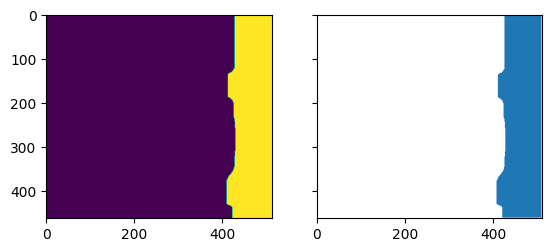

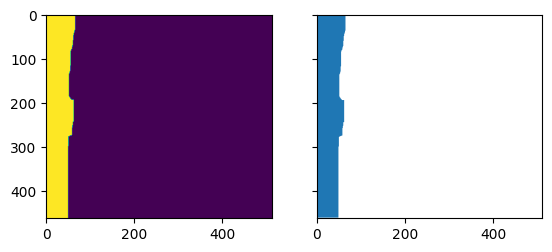

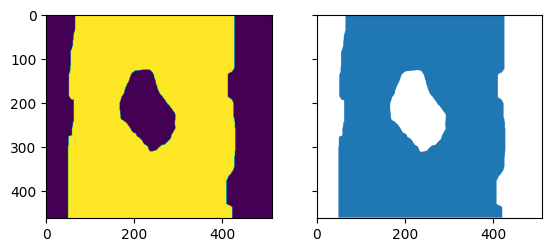

In [4]:
#raw_path = r"D:\[Code]\paper01\data\time.NPZ"
#fp.process_raw_flim(raw_path)
time_data_path = r"D:\[Code]\paper01\data\time_p.npz"
time_data = fp.open_flim(
    time_data_path,
    property_modifications={"lifetime_phase": 1000, "value": 1000},
)
(
    particle_mask,
    structure_index,
    process_properties,
    final_properties,
) = fa.extract_feature(
    time_data["intensity"][0],
    adaptive_threshold=431,
    kernel_shape=(20, 50),
    kernel_type="rectangle",
    first="open",
    snake_alpha=0.09,
    snake_beta=0.1,
    snake_gamma=0.01,
    snake_w_line=-3,
    snake_w_edge=10,
    nth_element=1,
    plot_process=True,
)
particle = fg.get_feature_from_contour(
    process_properties["snakes"][structure_index],
    np.zeros(time_data["intensity"][0].shape),
    name="particle",
)
wall_index = 0
wall_mask = np.zeros(time_data["intensity"][0].shape)
wall_mask[process_properties["labeled"] == wall_index + 1] = 1
wall = fg.get_feature_from_mask(wall_mask, name="wall")

membrane_index = 1
membrane_mask = np.zeros(time_data["intensity"][0].shape)
membrane_mask[process_properties["labeled"] == membrane_index + 1] = 1
membrane = fg.get_feature_from_mask(membrane_mask, "membrane")

volume = fg.get_rest_as_feature(features=[particle, membrane, wall], name="volume")

features = [particle, membrane, wall, volume]
for feature in features:
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
    ax = np.ravel(axes)[0]
    ax.imshow(feature.raster)
    ax = np.ravel(axes)[1]
    gpd.GeoSeries(feature.geometry).plot(ax=ax)
    plt.show()

fg.save_features(
    os.path.dirname(time_data_path), features, feature_base="time"
)

# Case - Flow

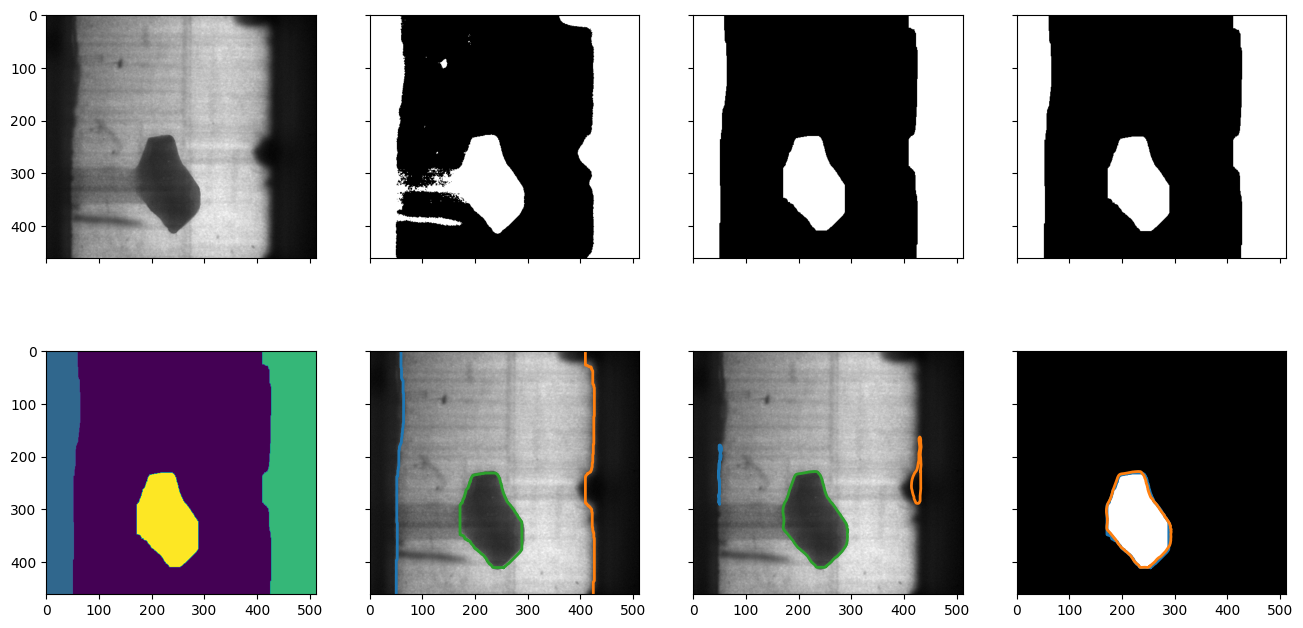

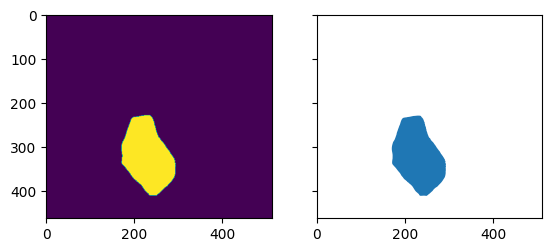

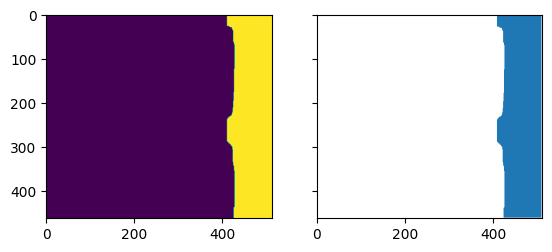

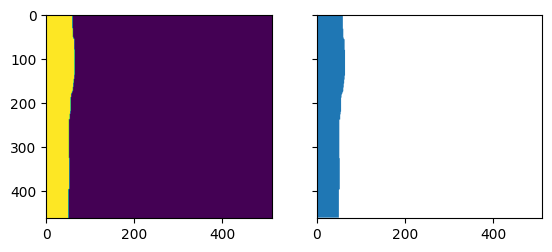

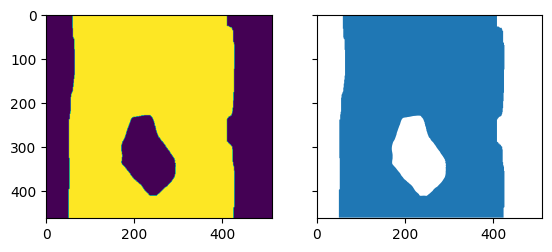

In [5]:
#raw_path = r"D:\[Code]\paper01\data\flow.NPZ"
#fp.process_raw_flim(raw_path)
flow_data_path = r"D:\[Code]\paper01\data\flow_p.npz"
flow_data = fp.open_flim(
    flow_data_path,
    property_modifications={"lifetime_phase": 1000, "value": 1000},
)
(
    particle_mask,
    structure_index,
    process_properties,
    final_properties,
) = fa.extract_feature(
    flow_data["intensity"][0],
    adaptive_threshold=431,
    kernel_shape=(20, 50),
    kernel_type="rectangle",
    first="open",
    snake_alpha=0.09,
    snake_beta=0.1,
    snake_gamma=0.01,
    snake_w_line=-3,
    snake_w_edge=10,
    nth_element=1,
    plot_process=True,
)
particle = fg.get_feature_from_contour(
    process_properties["snakes"][structure_index],
    np.zeros(flow_data["intensity"][0].shape),
    name="particle",
)
wall_index = 0
wall_mask = np.zeros(flow_data["intensity"][0].shape)
wall_mask[process_properties["labeled"] == wall_index + 1] = 1
wall = fg.get_feature_from_mask(wall_mask, name="wall")

membrane_index = 1
membrane_mask = np.zeros(flow_data["intensity"][0].shape)
membrane_mask[process_properties["labeled"] == membrane_index + 1] = 1
membrane = fg.get_feature_from_mask(membrane_mask, "membrane")

volume = fg.get_rest_as_feature(features=[particle, membrane, wall], name="volume")

features = [particle, membrane, wall, volume]
for feature in features:
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
    ax = np.ravel(axes)[0]
    ax.imshow(feature.raster)
    ax = np.ravel(axes)[1]
    gpd.GeoSeries(feature.geometry).plot(ax=ax)
    plt.show()

fg.save_features(
    os.path.dirname(flow_data_path), features, feature_base="flow"
)

# Capacitance

In [3]:
folder = r"D:\[Code]\paper01\data"
files = [f.split(".")[0] for f in os.listdir(folder) if all(c in f for c in ["capacitance", ".json"])]
files

['capacitance_ivium1395_1p3',
 'capacitance_ivium1401_1p5',
 'capacitance_ivium1408_0p8',
 'capacitance_ivium1465_1p8',
 'capacitance_ivium1467_2p1']

In [23]:
ph_shift = {
    1395 : 1.05,
    1401 : 1.3,
    1408 : 1.8,
    1465 : 1.5,
   1467 :  0
}
ph_shift

{1395: 1.05, 1401: 1.3, 1408: 1.8, 1465: 1.5, 1467: 0}

In [24]:
for f in files:
    raw = fp.open_flim(os.path.join(folder, f + "_old.NPZ"))
    number = int(f.split("_")[1][-4:])
    ph_shift[number]
    print(number, ph_shift[number], raw)

    np.savez_compressed(
        os.path.join(folder, f),
        **{
            k: v
            for k, v in zip(
                raw.keys(),
                [
                    raw[k].astype(np.uint16)
                    if not k == "value"
                    else raw[k].astype(np.uint16)
                    for k in raw.keys()
                ],
            )
        },
    )

1395 1.05 NpzFile 'D:\\[Code]\\paper01\\data\\capacitance_ivium1395_1p3_old.NPZ' with keys: intensity, lifetime_phase, value
1401 1.3 NpzFile 'D:\\[Code]\\paper01\\data\\capacitance_ivium1401_1p5_old.NPZ' with keys: intensity, lifetime_phase, value
1408 1.8 NpzFile 'D:\\[Code]\\paper01\\data\\capacitance_ivium1408_0p8_old.NPZ' with keys: intensity, lifetime_phase, value
1465 1.5 NpzFile 'D:\\[Code]\\paper01\\data\\capacitance_ivium1465_1p8_old.NPZ' with keys: intensity, lifetime_phase, value
1467 0 NpzFile 'D:\\[Code]\\paper01\\data\\capacitance_ivium1467_2p1_old.NPZ' with keys: intensity, lifetime_phase, value


In [9]:
for f in files:
    raw_path = os.path.join(folder, f + "_old.NPZ")
    print(raw_path)
    fp.process_raw_flim(raw_path)

D:\[Code]\paper01\data\capacitance_ivium1395_1p3_old.NPZ
intensity (245, 504, 512) (245, 462, 512)
lifetime_phase (245, 504, 512) (245, 462, 512)
value (245, 504, 512) (245, 462, 512)
D:\[Code]\paper01\data\capacitance_ivium1401_1p5_old.NPZ
intensity (245, 504, 512) (245, 462, 512)
lifetime_phase (245, 504, 512) (245, 462, 512)
value (245, 504, 512) (245, 462, 512)
D:\[Code]\paper01\data\capacitance_ivium1408_0p8_old.NPZ
intensity (245, 504, 512) (245, 462, 512)
lifetime_phase (245, 504, 512) (245, 462, 512)
value (245, 504, 512) (245, 462, 512)
D:\[Code]\paper01\data\capacitance_ivium1465_1p8_old.NPZ
intensity (1047, 504, 512) (1047, 462, 512)
lifetime_phase (1047, 504, 512) (1047, 462, 512)
value (1047, 504, 512) (1047, 462, 512)
D:\[Code]\paper01\data\capacitance_ivium1467_2p1_old.NPZ
intensity (1047, 504, 512) (1047, 462, 512)
lifetime_phase (1047, 504, 512) (1047, 462, 512)
value (1047, 504, 512) (1047, 462, 512)


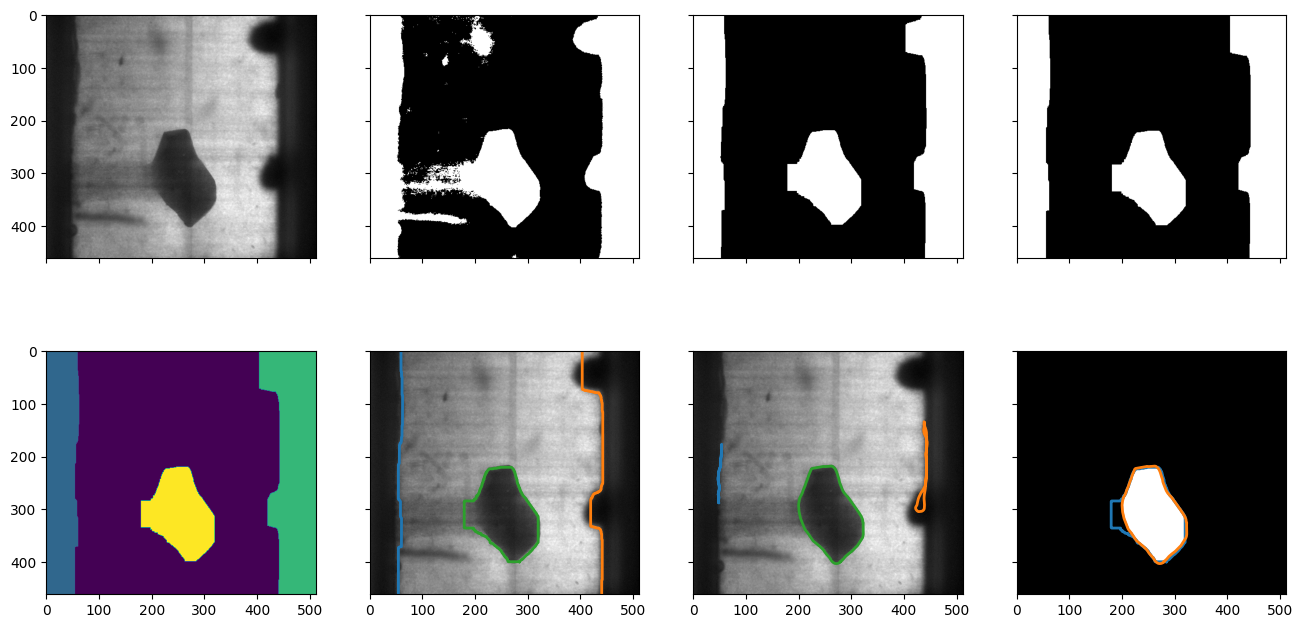

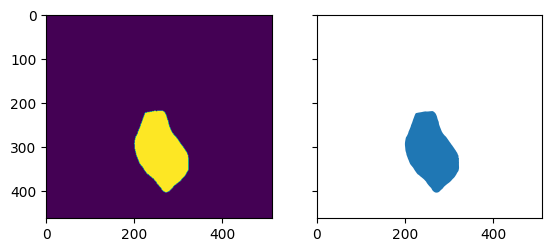

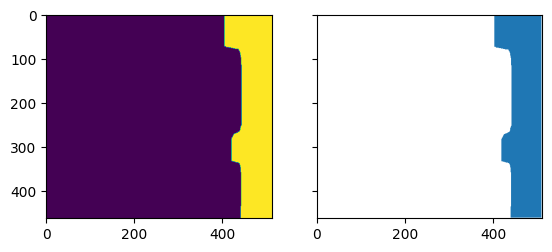

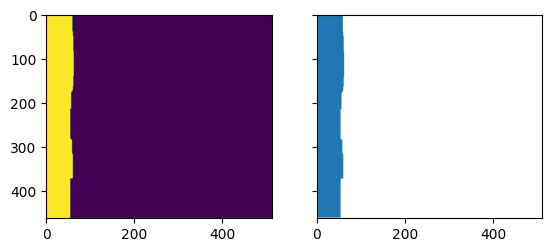

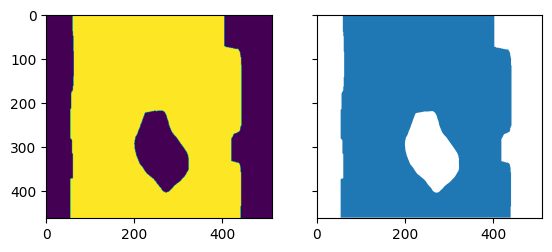

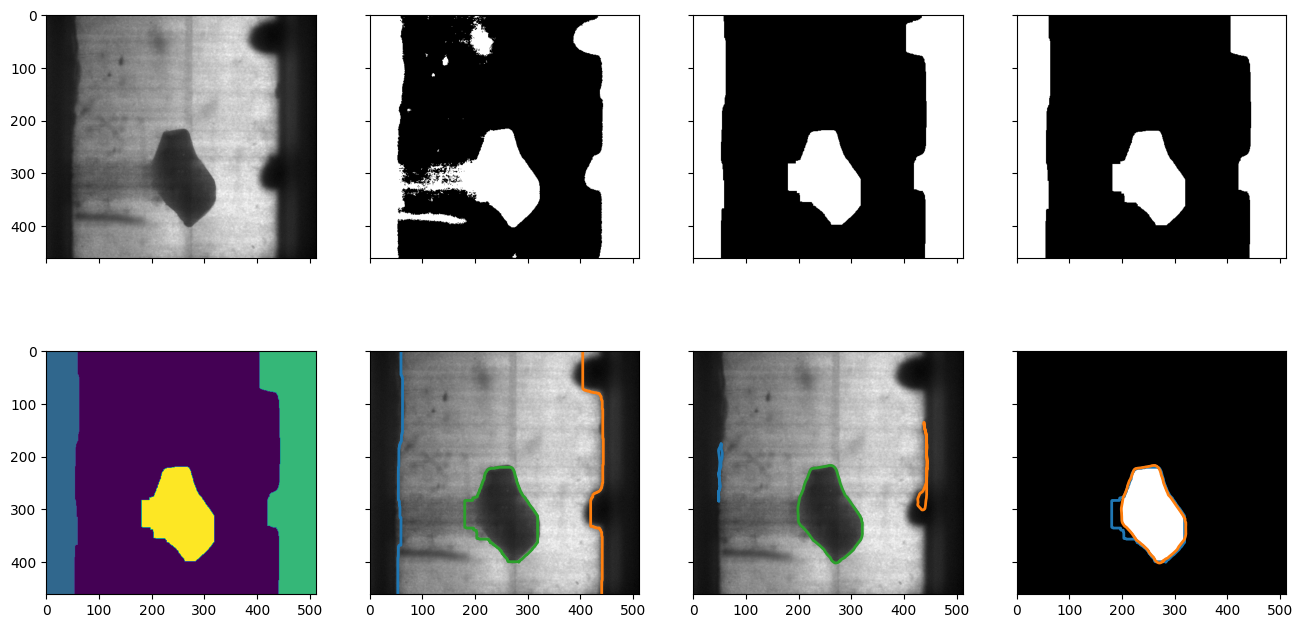

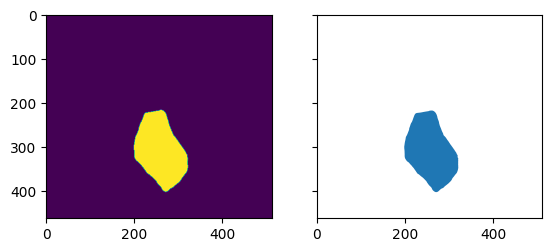

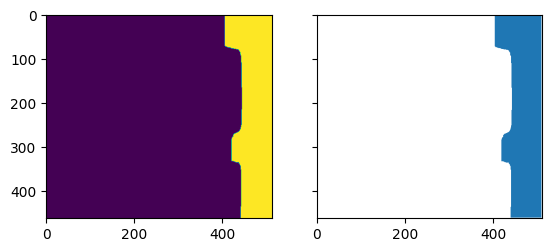

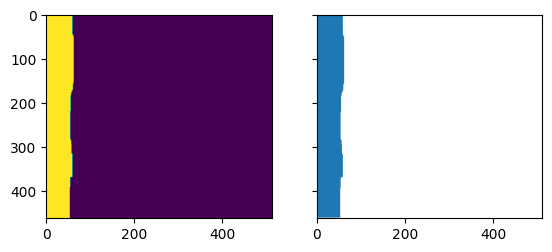

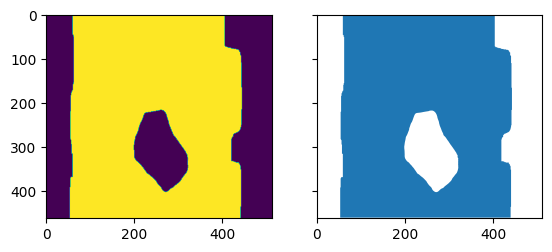

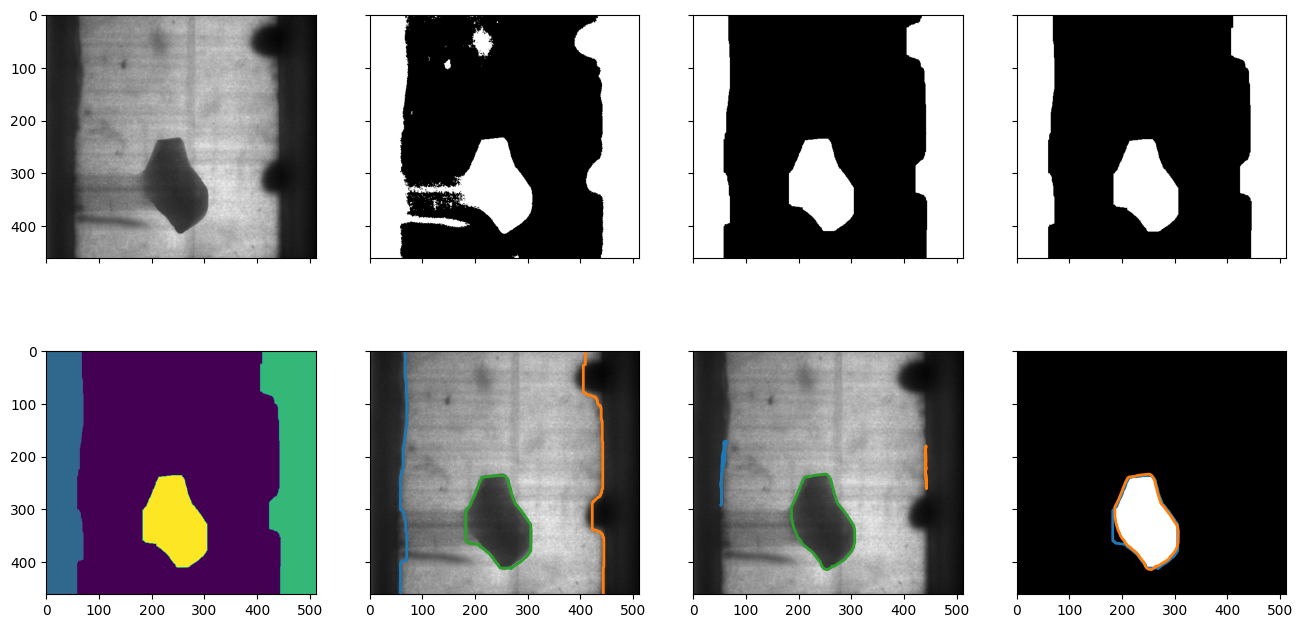

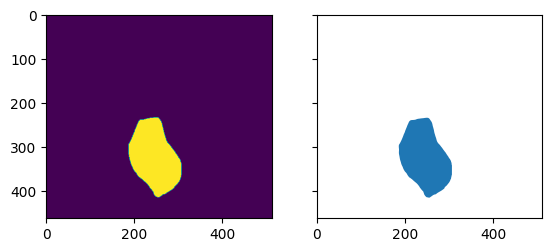

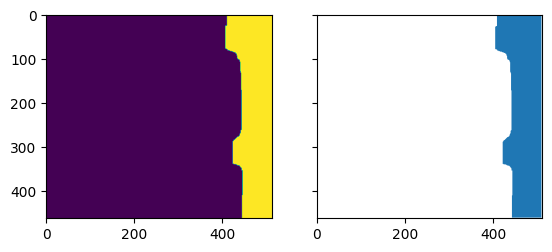

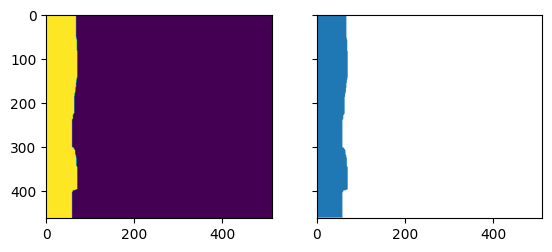

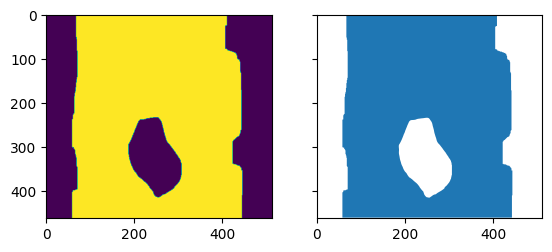

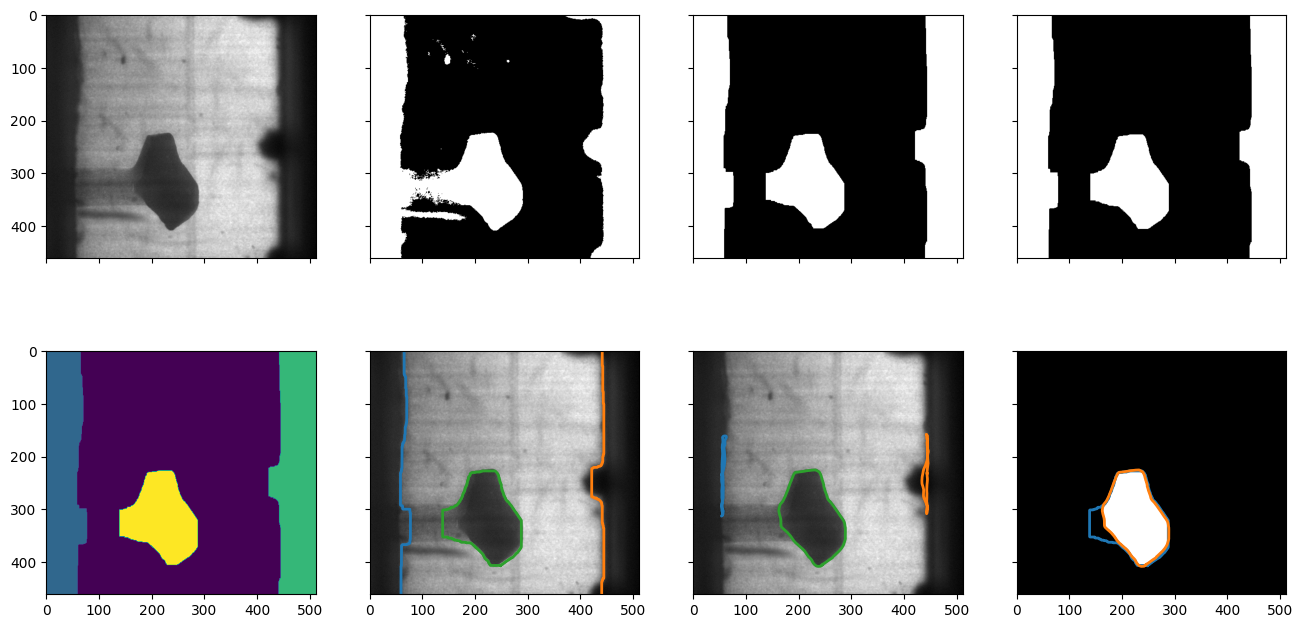

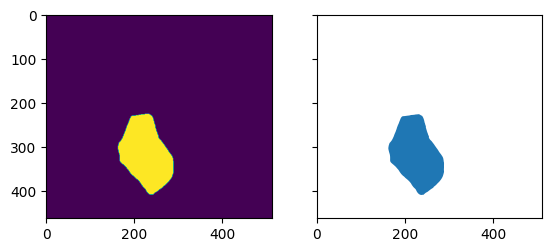

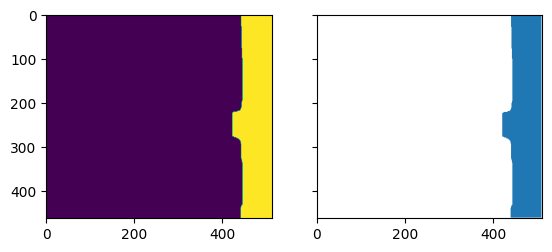

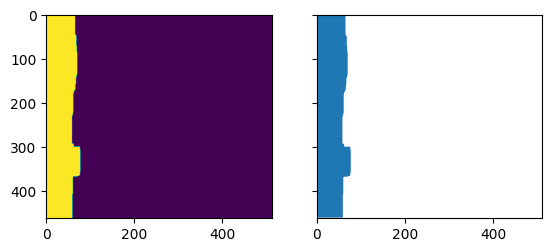

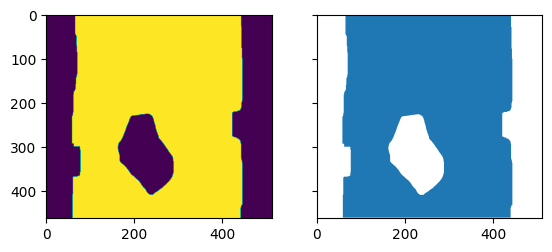

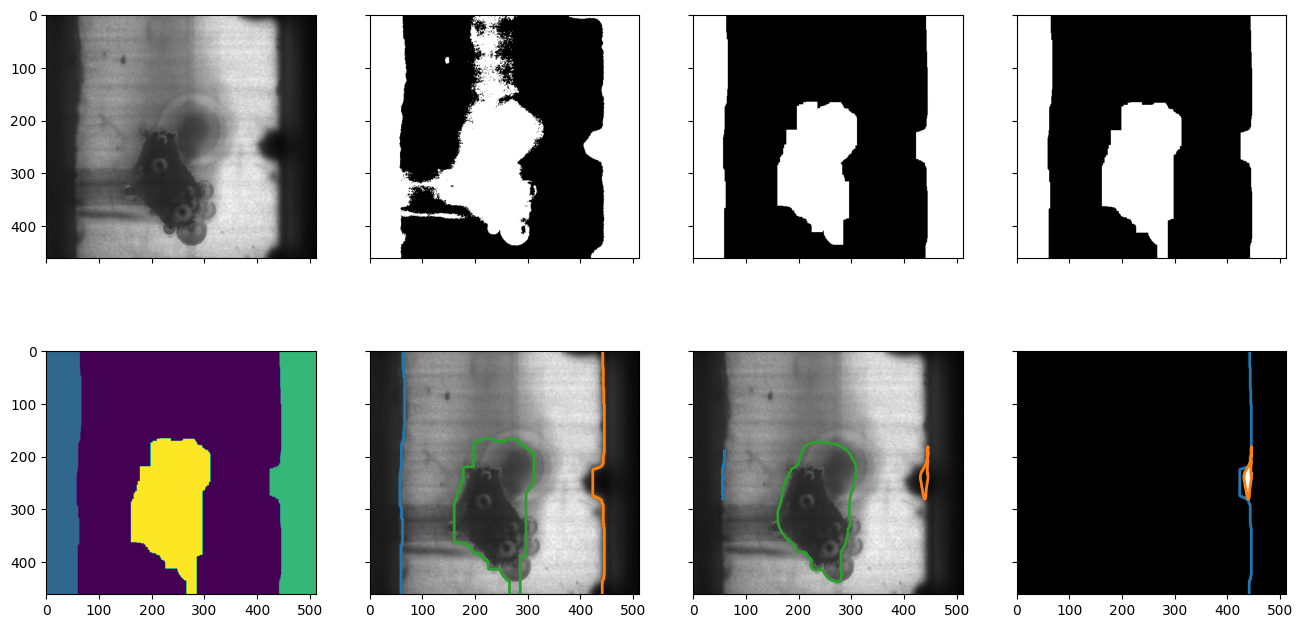

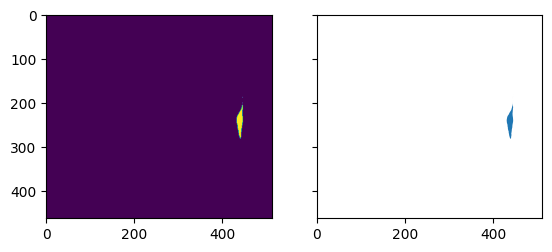

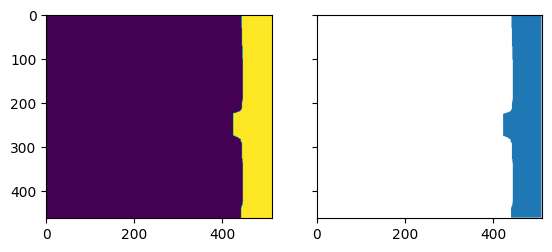

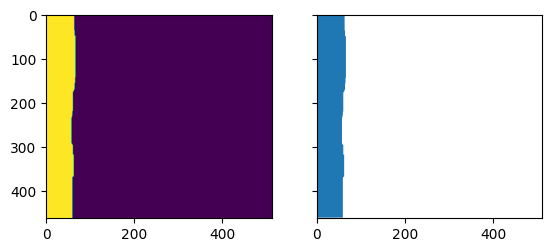

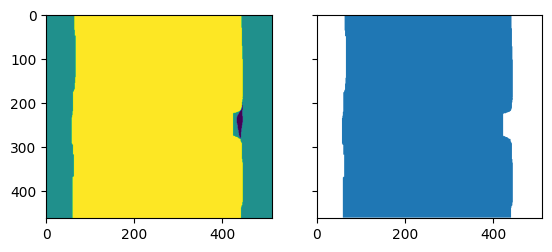

In [6]:
for f in files:
    capacitance_data_path = os.path.join(folder, f + "_p.npz")
    capacitance_data = fp.open_flim(
        capacitance_data_path,
        property_modifications={"lifetime_phase": 1000, "value": 1000},
    )
    (
        particle_mask,
        structure_index,
        process_properties,
        final_properties,
    ) = fa.extract_feature(
        capacitance_data["intensity"][0],
        adaptive_threshold=431,
        kernel_shape=(20, 50),
        kernel_type="rectangle",
        first="open",
        snake_alpha=0.09,
        snake_beta=0.1,
        snake_gamma=0.01,
        snake_w_line=-3,
        snake_w_edge=10,
        nth_element=1,
        plot_process=True,
    )
    particle = fg.get_feature_from_contour(
        process_properties["snakes"][structure_index],
        np.zeros(capacitance_data["intensity"][0].shape),
        name="particle",
    )
    wall_index = 0
    wall_mask = np.zeros(capacitance_data["intensity"][0].shape)
    wall_mask[process_properties["labeled"] == wall_index + 1] = 1
    wall = fg.get_feature_from_mask(wall_mask, name="wall")

    membrane_index = 1
    membrane_mask = np.zeros(capacitance_data["intensity"][0].shape)
    membrane_mask[process_properties["labeled"] == membrane_index + 1] = 1
    membrane = fg.get_feature_from_mask(membrane_mask, "membrane")

    volume = fg.get_rest_as_feature(features=[particle, membrane, wall], name=f)

    features = [particle, membrane, wall, volume]
    for feature in features:
        fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
        ax = np.ravel(axes)[0]
        ax.imshow(feature.raster)
        ax = np.ravel(axes)[1]
        gpd.GeoSeries(feature.geometry).plot(ax=ax)
        plt.show()

    fg.save_features(os.path.dirname(capacitance_data_path), features, feature_base=f)